## Investigating Fandango Movie Ratings
In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest. Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.

- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.

- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

This project aims to analyse the data distribution of fandangos actual ratings and the displayed ratings.this project will be using data collected from 2016 and 2017 from a publicly available repository on github.
Github links used:
- https://github.com/mircealex/Movie_ratings_2016_17
- https://github.com/mircealex/Movie_ratings_2016_17/blob/b993428bc5d27731e6a659b04b3b866145688f86/movie_ratings_16_17.csv
- https://github.com/mircealex/Movie_ratings_2016_17/blob/b993428bc5d27731e6a659b04b3b866145688f86/fandango_score_comparison.csv

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
score_comp=pd.read_csv('fandango_score_comparison.csv')
movie_rate=pd.read_csv('movie_ratings_16_17.csv')
#Display the first few rows of the dataset to briefly explore it
print(score_comp.head(5))
print(movie_rate.head(5))


                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70 

Isolate the columns that offer information about Fandango's ratings in separate variables so we have just the data we're interested in more readily available for later use. Setting copies to avoid any SettingWithCopyWarning later on.

In [24]:
fand_data=score_comp[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
print(fand_data.head(5))
data_16_17=movie_rate[['movie', 'year', 'fandango']].copy()
print(data_16_17.head(5))

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  
                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0


Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest is composed of all movie ratings stored on Fandago website irrespective of the year the movie was released.

In order to draw a correct and appropriate conclusion about the entire population, we need to make sure that our samples are as representative as possible from the data populations before and after Hickey's analysis.

#### Sampling of the data

In the dataset before Hickey's analysis there are 146 films. according to the _README.md_ file of the repository the sampling criteria was:
- Must have at least 30 Fandango reviews
- Must have sold tickets in 2015
This sampling is not random and does not include the entire population of movies in 2015 as not all sold tickets in 2015 or had at least 30 reviews on fandango.

In the dataset after Hickey's analysis there is 214 films. The _README.md_ file shows the sample criteria was:
- Must have a significant number of votes
- Must have been released in 2016 or 2017
As before this sampling is not random as not every film is included with this sampling criteria. This sample is also not a good representation of the population of movies in the given time period.

This non-probabilistic sampling (purposive sampling) does not accurately represent the population and therefore cannot be used to describe the difference in populations during analysis.

#### Changing the goal

As the data sampling is not random we cannot reliably describe differences in population. We will therefore change the goal of the project to seeing if there are any differences in the Fandango ratings in 2015 and Fandango ratings in 2016

### Isolating Samples
We have two samples that we want to compare:
- Fandango popular movies in 2015
- Fandango popular movies in 2016
We will define popular films as having at least 30 Fandango ratings as used in the 2015 sample.

The data does not provide information about the number of fan ratings on Fandango. To workaround this we will take 10 random samples and check the number of fan ratings on the Fandango website.

In [25]:
data_16_17.sample(10,random_state=0)

,movie,year,fandango
197,The Take (Bastille Day),2016,4.0
37,Come and Find Me,2016,4.0
89,Kickboxer,2016,4.0
176,The Founder,2016,4.0
170,The Darkness,2016,2.5
75,Ice Age: Collision Course,2016,4.0
96,Lion,2016,4.0
137,Ride Along 2,2016,4.0
5,A Monster Calls,2016,4.0
83,Jane Got a Gun,2016,3.5


We find that 9 out of the 10 movies have at least 30 Fandango ratings. We can be confident that this method will be representative enough for the population in question.

To check that the sample contains popular films we can run:

In [26]:
print(sum(fand_data['Fandango_votes']<30))

0


To isolate films in the year 2015 and 2016 we must extract this data from the 'FILM' column as there is no explicit data for year:

In [27]:
fand_data['Year']=fand_data['FILM'].str[-5:-1]
print(fand_data.head(3))

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   

   Fandango_votes  Fandango_Difference  Year  
0           14846                  0.5  2015  
1           12640                  0.5  2015  
2           12055                  0.5  2015  


We can now extract films based on their year. Examining the frequency of values in the year column:

In [28]:
print(fand_data['Year'].value_counts())

2015    129
2014     17
Name: Year, dtype: int64


In [29]:
fandango_2015=fand_data[fand_data['Year'] == str(2015)].copy()
fandango_2015.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


In [30]:
fandango_2016=fand_data[fand_data['Year'] == str(2016)]
fandango_2016.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year


From this we can see that there are no movies released in 2016 in the first dataset.

In [31]:
print(data_16_17['year'].value_counts())

2016    191
2017     23
Name: year, dtype: int64


In [32]:
fandango_2016=data_16_17[data_16_17['year']==2016]
fandango_2016.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


### Comparing Distribution Shapes for 2015 and 2016

Our goal is to determine if there is any differences between Fandango's ratings for popular movies in 2015 and 2016. First we will compare by visualising the data.

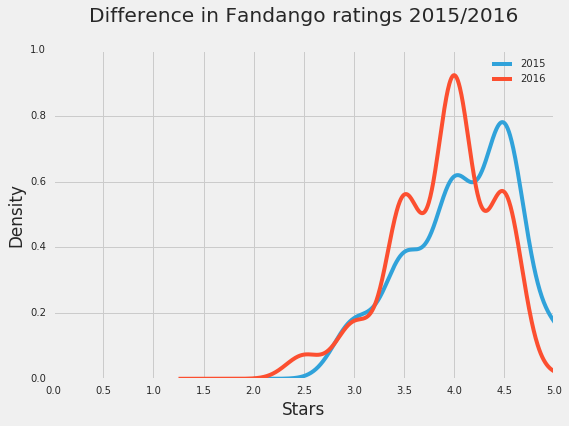

In [35]:
#kde for 2015
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title('Difference in Fandango ratings 2015/2016',y=1.07)
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

Each distribution is strongly left skewed with the 2016 distribution being skewed slightly to the left pf the 2015 distribution.
The 2016 distribution has a much greater densityof 4.0 star ratings. From these comparisons movies in 2016 were generally rated lower.

### Comparing Relative Frequencies

In [40]:
print('2015 Proportions' + '\n' + '-' * 16)
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [43]:
print('2016 Proportions' + '\n' + '-' * 16)
fandango_2016['fandango'].value_counts(normalize=True).sort_index()*100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

The samples have a different number of movies so absolute frequencies is not a good method. Using percentages of the samples would be a better metric. The direction of change is not clear from the two kernel density plots.

### Determining Direction of Change
Let's take some more summary statistics to ask this question.

In [54]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


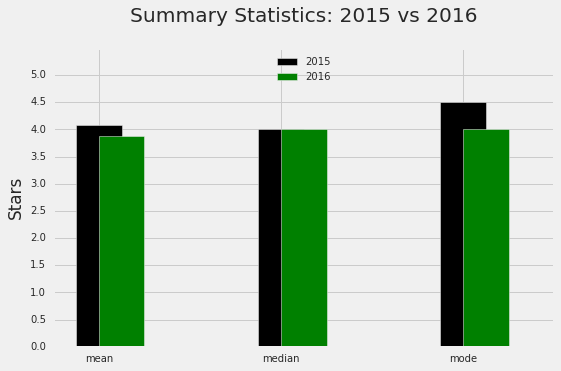

In [59]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = 'black', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = 'green', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))
plt.title('Summary Statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

### Conclusion
Our analysis showed that there is indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system following Hickey's analysis.